In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import os

data_url = "https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD"

# download data
if not os.path.isfile("data.csv"):
    urllib.request.urlretrieve(data_url, "data.csv")

# load data
data = pd.read_csv("data.csv")

In [2]:
data.head() 

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [3]:
data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

### Cleaning data

In [4]:
# find missing values
missing_values = data.isnull().sum()
missing_values

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           125590
Vict Age               0
Vict Sex          119391
Vict Descent      119399
Premis Cd             10
Premis Desc          550
Weapon Used Cd    589089
Weapon Desc       589089
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          835674
Crm Cd 3          899144
Crm Cd 4          901293
LOCATION               0
Cross Street      759302
LAT                    0
LON                    0
dtype: int64

In [5]:
## print((data['Vict Age'] < 0).sum()) # There are 89 records with negative age - removing it
data = data[data['Vict Age'] >= 0]

### Exploratory data

In [6]:
# Some statistics about victims age depends on sex
data[data["Vict Sex"] == "M"]["Vict Age"].describe()

count    370012.000000
mean         37.458223
std          18.493757
min           0.000000
25%          27.000000
50%          36.000000
75%          50.000000
max          99.000000
Name: Vict Age, dtype: float64

In [7]:
data[data["Vict Sex"] == "F"]["Vict Age"].describe()

count    329777.000000
mean         38.308860
std          16.077207
min           0.000000
25%          27.000000
50%          35.000000
75%          48.000000
max          99.000000
Name: Vict Age, dtype: float64

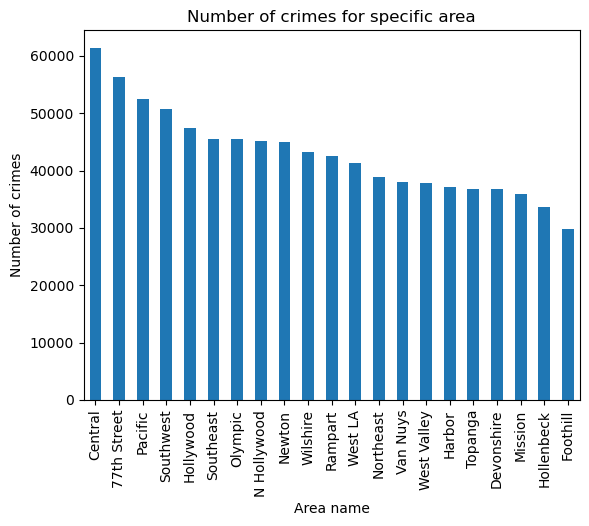

In [8]:
data['AREA NAME'].value_counts().plot(kind='bar')
plt.title('Number of crimes for specific area')
plt.xlabel('Area name')
plt.ylabel('Number of crimes')
plt.show()

In [9]:
print("Most popular crime:\n", data['Crm Cd'].value_counts()[:5])
# Here we can see that the most common crime is stealing vehicle.

Most popular crime:
 Crm Cd
510    96750
624    71648
354    55728
330    55598
310    55199
Name: count, dtype: int64


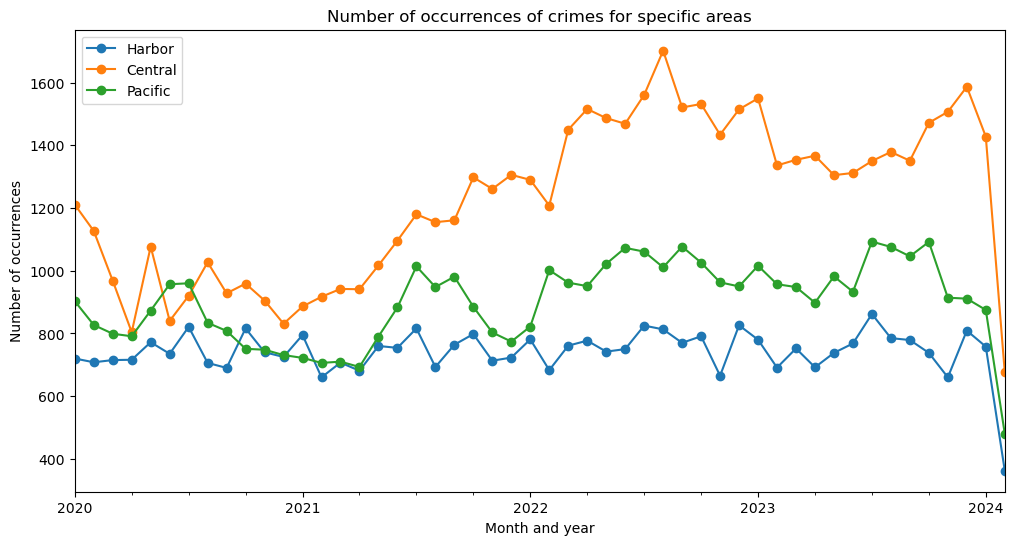

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Przekształć kolumnę 'DATE OCC' do obiektu daty i czasu, określając poprawny format
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')
d1 = data[data['AREA NAME'] == 'Harbor']
d2 = data[data['AREA NAME'] == 'Central']
d3 = data[data['AREA NAME'] == 'Newton']
# Grupujemy dane według miesiąca i roku oraz zliczamy liczbę wystąpień przestępstw
count_by_month_year1 = d1.groupby(data['DATE OCC'].dt.to_period('M')).size()
count_by_month_year2 = d2.groupby(data['DATE OCC'].dt.to_period('M')).size()
count_by_month_year3 = d3.groupby(data['DATE OCC'].dt.to_period('M')).size()

count_by_month_year1.plot(marker='o', linestyle='-', figsize=(12, 6), label='Harbor')
count_by_month_year2.plot(marker='o', linestyle='-', figsize=(12, 6), label='Central')
count_by_month_year3.plot(marker='o', linestyle='-', figsize=(12, 6), label='Pacific')

plt.title('Number of occurrences of crimes for specific areas')
plt.xlabel('Month and year')
plt.ylabel('Number of occurrences')
plt.legend()
plt.show()